# INTERMEDIATE time series forecasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

c:\Users\emanu\anaconda3\envs\hs01\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
np.__version__

'1.26.1'

In [3]:
# fetch data 
df = pd.read_csv("data/AirPassengers.csv", delimiter=",")
print(df.info())
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


## Darts library 

In [5]:
# craete darts series 
series_air = TimeSeries.from_dataframe(df,"Month","#Passengers")
# Set aside the last 36 months as a validation series
#train, val = series[:-36], series[-36:]

<Axes: xlabel='Month'>

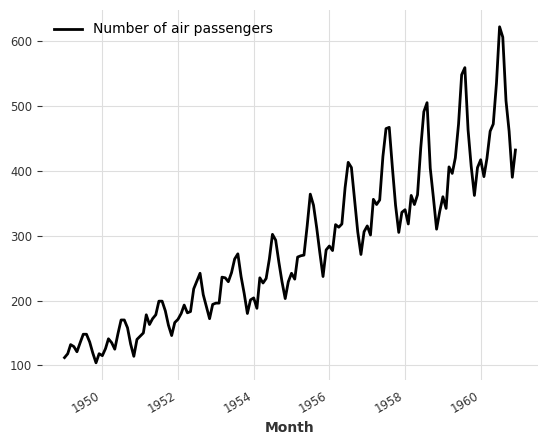

In [6]:
series_air.plot(label='Number of air passengers')

In [7]:
from darts.dataprocessing.transformers import Scaler
scaler_air = Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)

<Axes: xlabel='Month'>

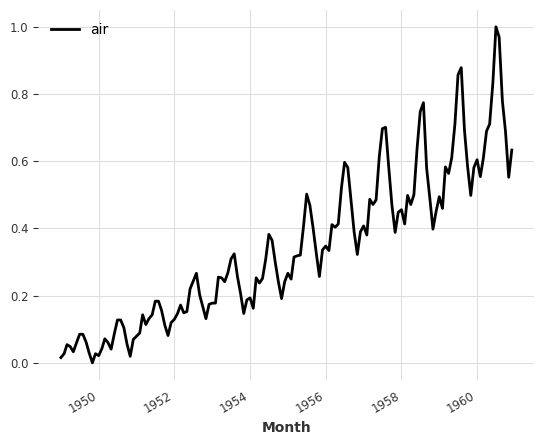

In [8]:
series_air_scaled.plot(label='air')

In [12]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]


In [2]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [10]:
model_air = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=10, random_state=0)

In [14]:
model_air.fit([train_air], verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=10, random_state=0)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 26.05%


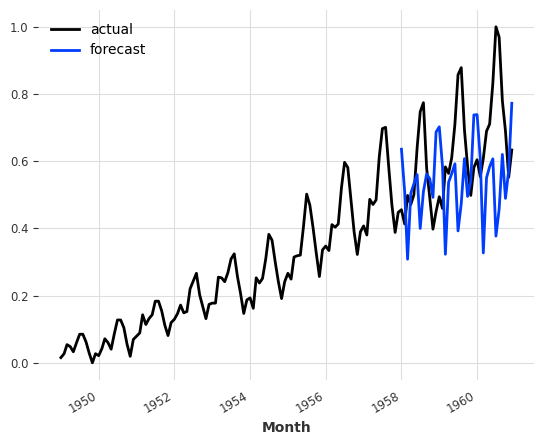

In [15]:
pred = model_air.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))